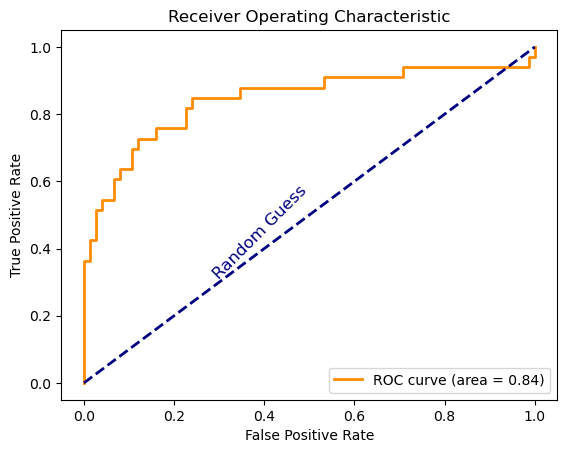

[[69  6]
 [13 20]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        75
           1       0.77      0.61      0.68        33

    accuracy                           0.82       108
   macro avg       0.81      0.76      0.78       108
weighted avg       0.82      0.82      0.82       108



In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/Users/mehtap/Downloads/PCOS_data.csv')

# Define features and target variable
X = data.iloc[:, 3:-1]  # Exclude the first three columns (Sl. No, Patient File No, PCOS (Y/N))
y = data['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_imputed)

# Calculate the probabilities for each class
y_scores = svm_classifier.decision_function(X_test_imputed)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.text(0.5, 0.3, 'Random Guess', fontsize=12, va='bottom', ha='right', color='navy', rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
